In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve
from sklearn import tree

In [2]:
x = pd.read_csv(r'C:/ML/Lead/Lead_Scoring.csv')

In [3]:
x.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
x.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
x.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
x.shape

(9240, 37)

In [8]:
sum(x.duplicated(subset = 'Prospect ID')) == 0

True

In [9]:
sum(x.duplicated(subset = 'Lead Number')) ==0

True

In [10]:
x=x.drop(columns=['Prospect ID','Lead Number'])

In [11]:
x.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
x['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Germany                    4
Kuwait                     4
South Africa               4
Nigeria                    4
Sweden                     3
Netherlands                2
Uganda                     2
Italy                      2
Belgium                    2
Bangladesh                 2
Philippines                2
Ghana                      2
China                      2
Asia/Pacific Region        2
Sri Lanka                  1
Tanzania                   1
Switzerland                1
Vietnam                    1
Malaysia                   1
Russia        

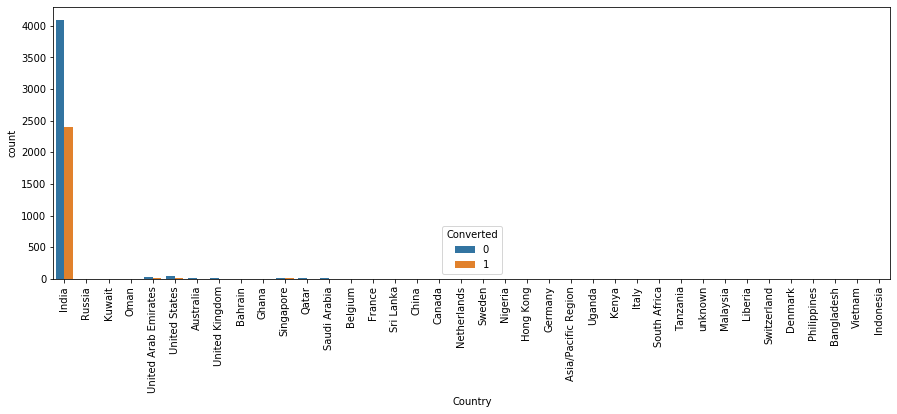

In [13]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x.Country, hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [14]:
x['Country'] = x['Country'].replace(np.nan,'India')

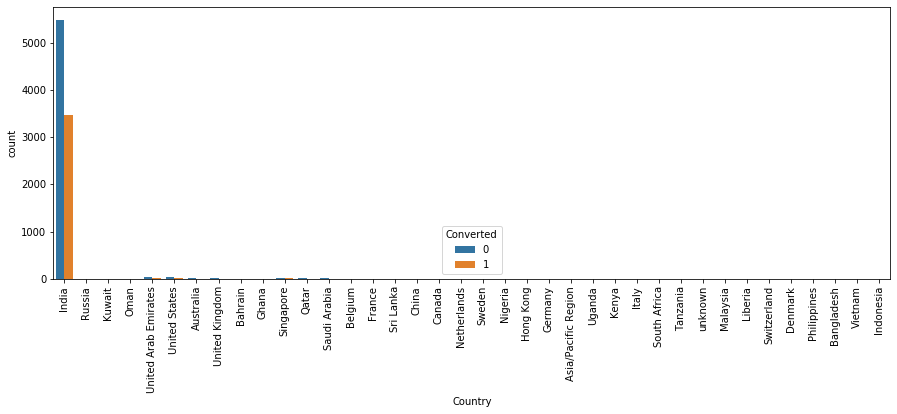

In [15]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x.Country, hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [16]:
x.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [17]:
cdrop=['Country']

In [18]:
x.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [19]:
x['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [20]:
x = x.replace('Select', np.nan)

In [21]:
x['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

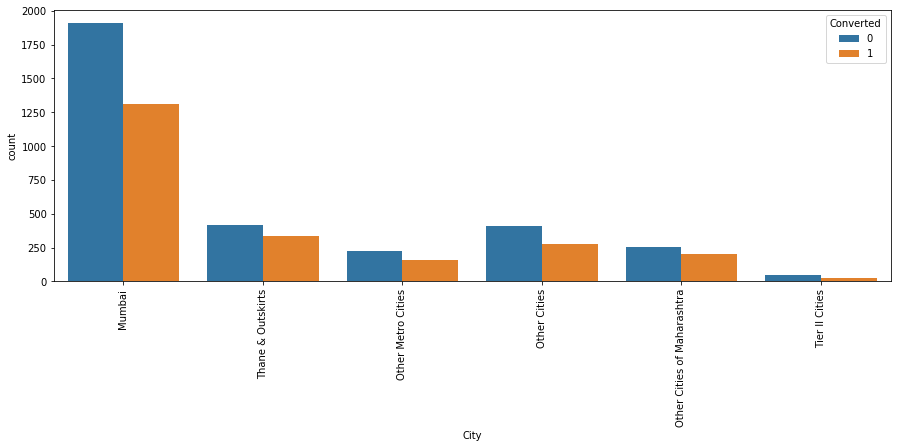

In [22]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x.City, hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [23]:
x['City'] = x['City'].replace(np.nan,'Mumbai')

In [24]:
x.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

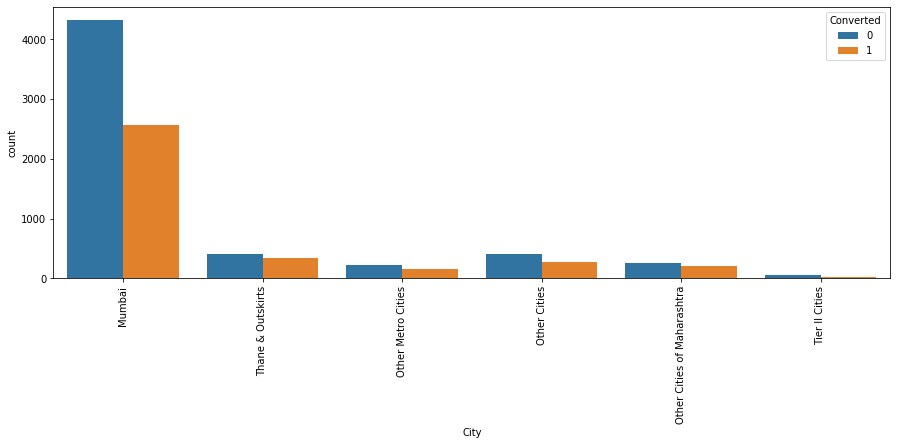

In [25]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x.City, hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [26]:
x['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

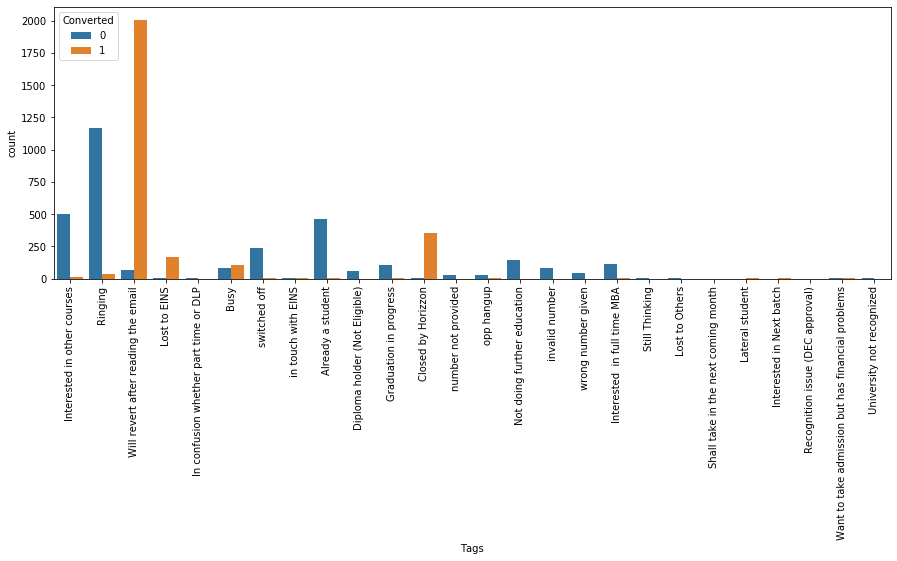

In [27]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x.Tags, hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
x['Tags'] = x['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

x['Tags'] = x['Tags'].replace(['switched off','Already a student','Not doing further education','invalid number','wrong number given','Interested  in full time MBA'] , 'Other_Tags')

In [29]:
x['Tags'].value_counts(dropna=False)

NaN                                    3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [30]:
x['Tags'] = x['Tags'].replace(np.nan,'Not Specified')

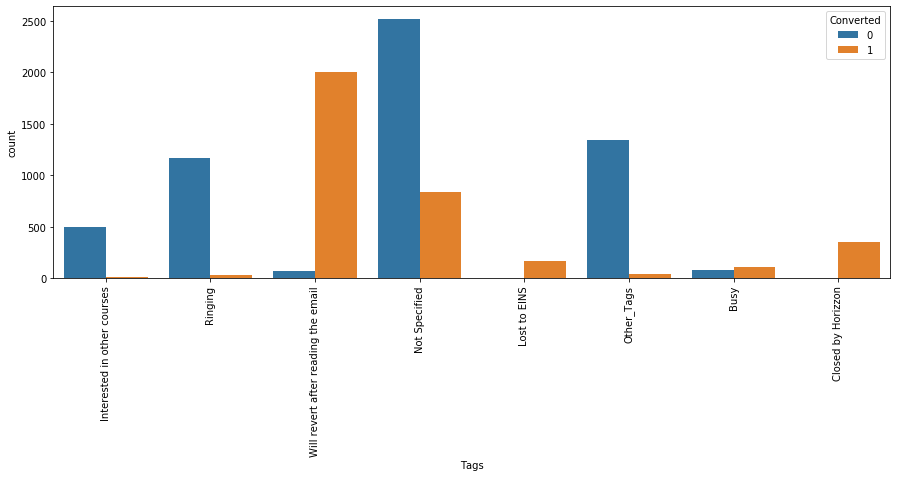

In [31]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x.Tags, hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [32]:
x.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [33]:
x['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

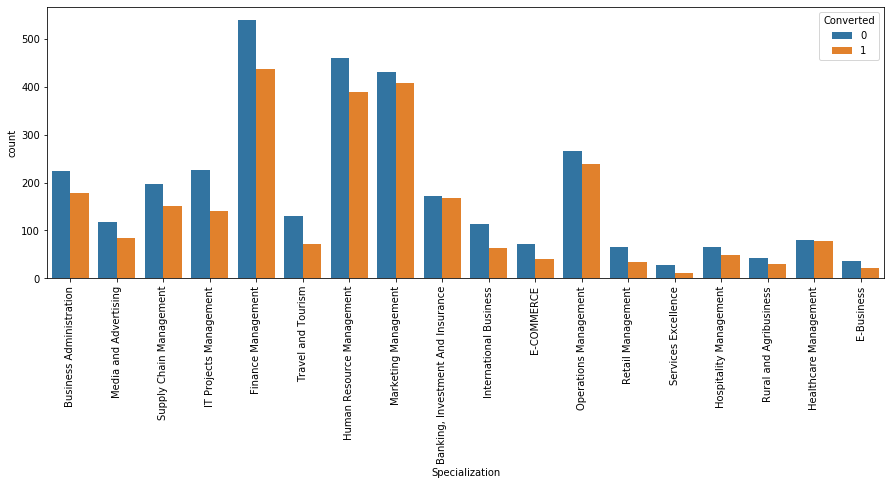

In [34]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x.Specialization, hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [35]:
x['Specialization'] = x['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management_Specializations')  

In [36]:
x['Specialization'].value_counts(dropna=False)

Management_Specializations           4253
NaN                                  3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [37]:
x['Specialization'] = x['Specialization'].replace(np.nan,'Not Specified')

In [38]:
x['Specialization'].value_counts(dropna=False)

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

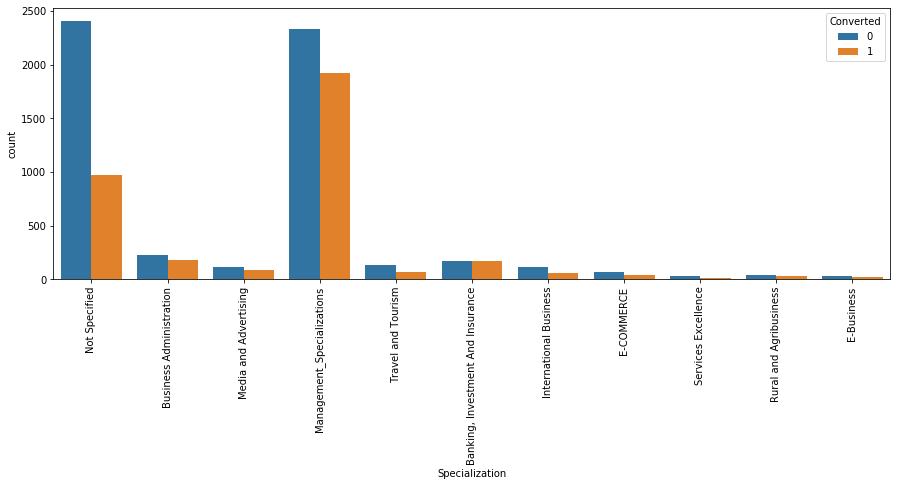

In [39]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x.Specialization, hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [40]:
x['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
testone                 1
WeLearn                 1
blog                    1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [41]:
x['Lead Source'] = x['Lead Source'].replace(np.nan,'Others')

In [42]:
x['Lead Source'] = x['Lead Source'].replace('google','Google')
x['Lead Source'] = x['Lead Source'].replace('Facebook','Social Media')
x['Lead Source'] = x['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others') 

In [43]:
x['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

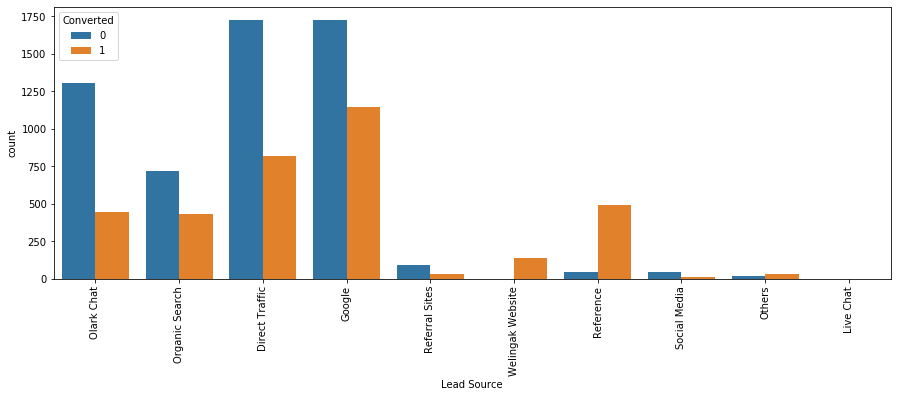

In [44]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x['Lead Source'], hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [45]:
x.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [46]:
x['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [47]:
x['What is your current occupation'] = x['What is your current occupation'].replace(np.nan,'Unemployed')

In [48]:
x['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

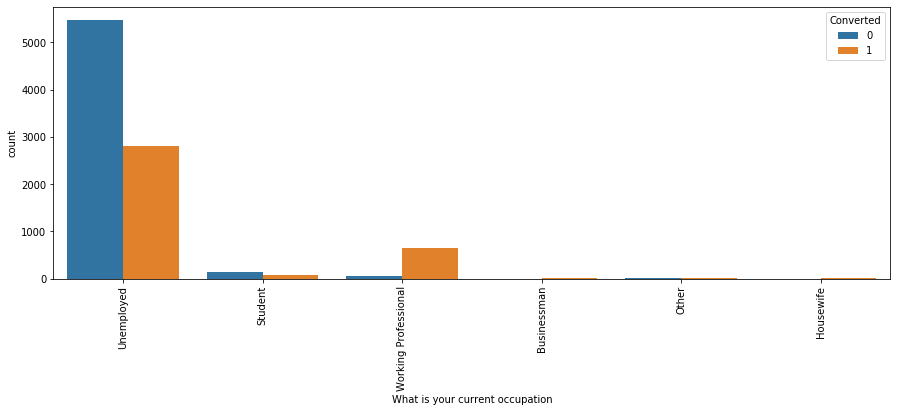

In [49]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x['What is your current occupation'], hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [50]:
x.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [51]:
x['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [52]:
x['What matters most to you in choosing a course'] = x['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

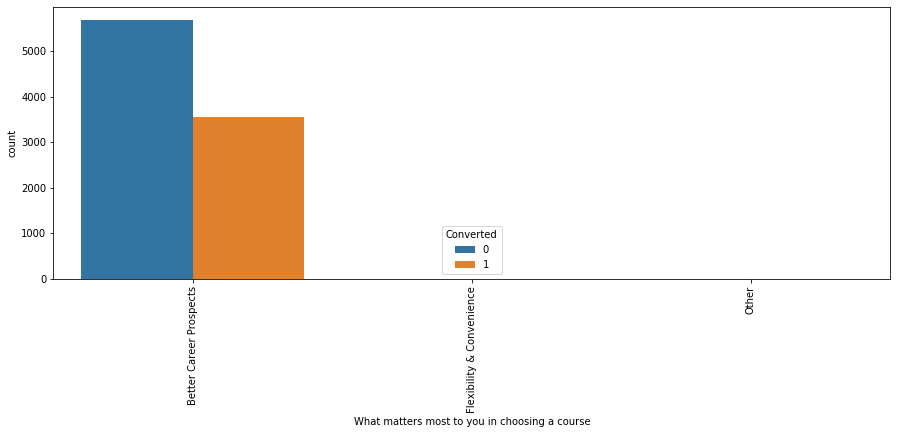

In [53]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x['What matters most to you in choosing a course'], hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [54]:
x.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [55]:
cdrop.append('What matters most to you in choosing a course')
cdrop

['Country', 'What matters most to you in choosing a course']

In [56]:
x['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [57]:
x['Last Activity'] = x['Last Activity'].replace(np.nan,'Others')
x['Last Activity'] = x['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [58]:
x['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

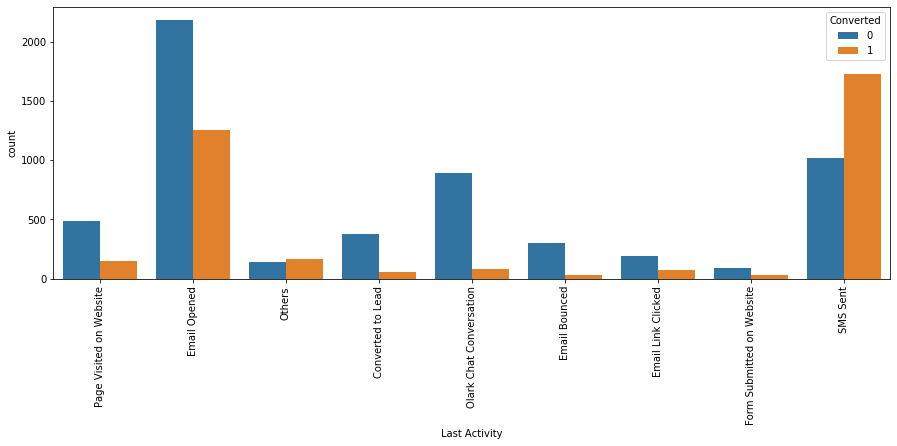

In [59]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x['Last Activity'], hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [60]:
cols=x.columns
for i in cols:
    if((100*(x[i].isnull().sum()/len(x.index))) >= 45):
        x.drop(i, 1, inplace = True)

In [61]:
x.isnull().sum()

Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

In [62]:
x['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

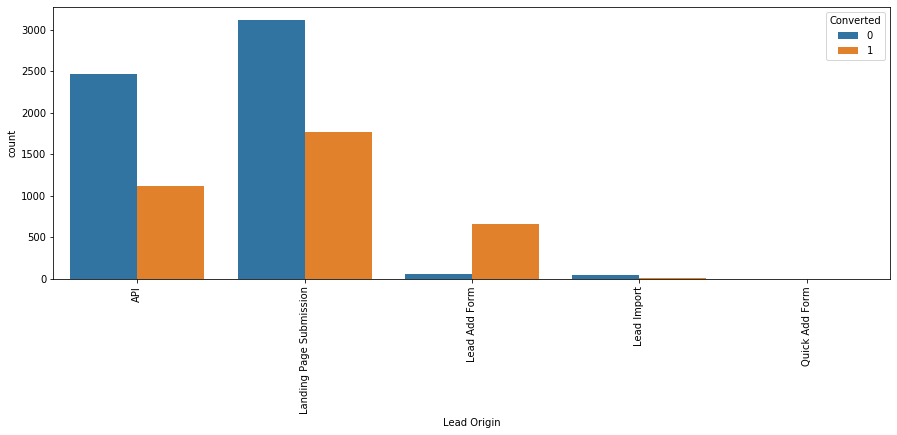

In [63]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x['Lead Origin'], hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [64]:
x['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

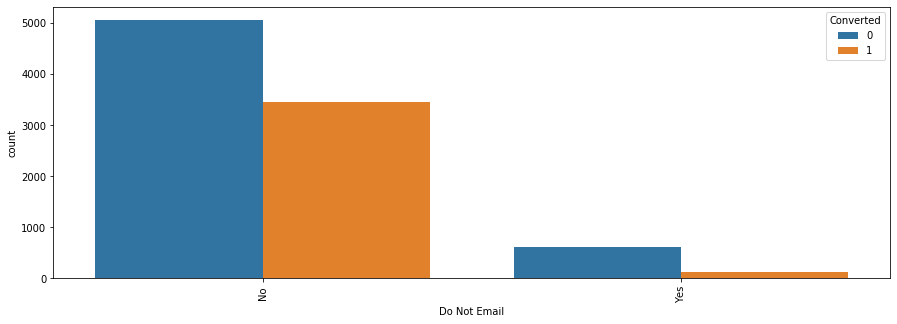

In [65]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x['Do Not Email'], hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [66]:
x['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

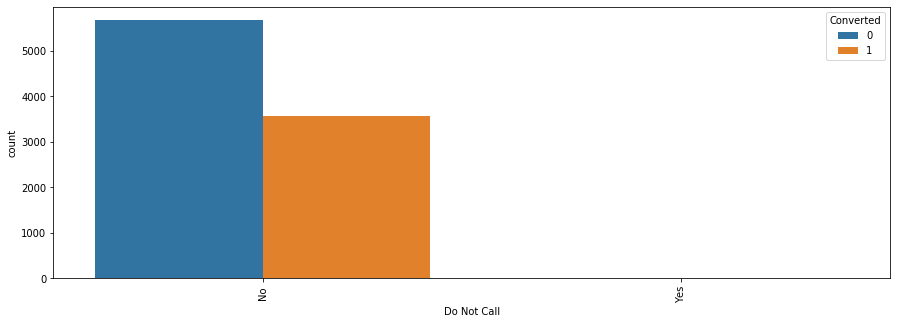

In [67]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x['Do Not Call'], hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [68]:
cdrop.append('Do Not Call')
cdrop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [69]:
x['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [70]:
x['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [71]:
x['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [72]:
x['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [73]:
x['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [74]:
x['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [75]:
x['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [76]:
x['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [77]:
x['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [78]:
x['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [79]:
x['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [80]:
x['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [81]:
x['Last Notable Activity'] = x['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced','Resubscribed to emails','View in browser link Clicked','Approached upfront','Form Submitted on Website','Email Received'],'Other_Notable_activity')

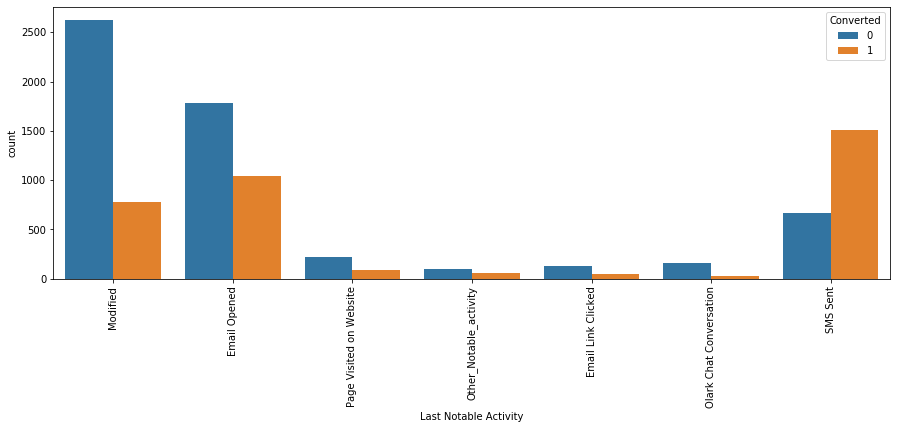

In [82]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x['Last Notable Activity'], hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [83]:
x['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [84]:
cdrop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

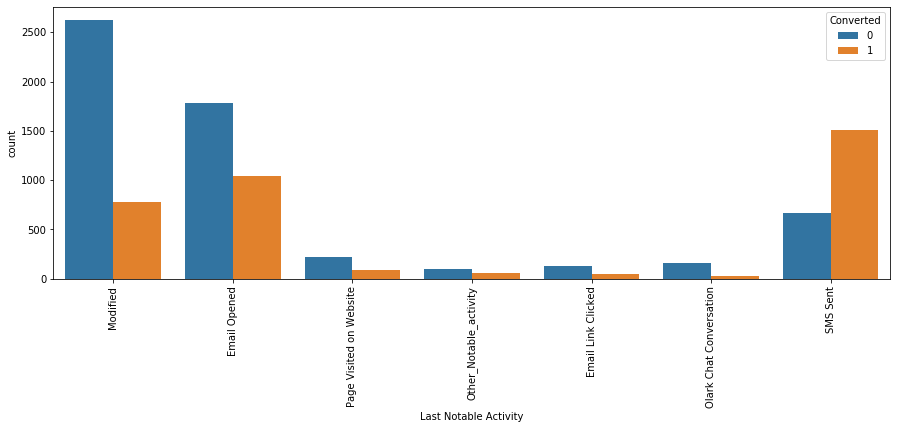

In [85]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x['Last Notable Activity'], hue=x.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [86]:
cdrop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [87]:
x = x.drop(cdrop,1)

In [88]:
x.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
What is your current occupation             0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

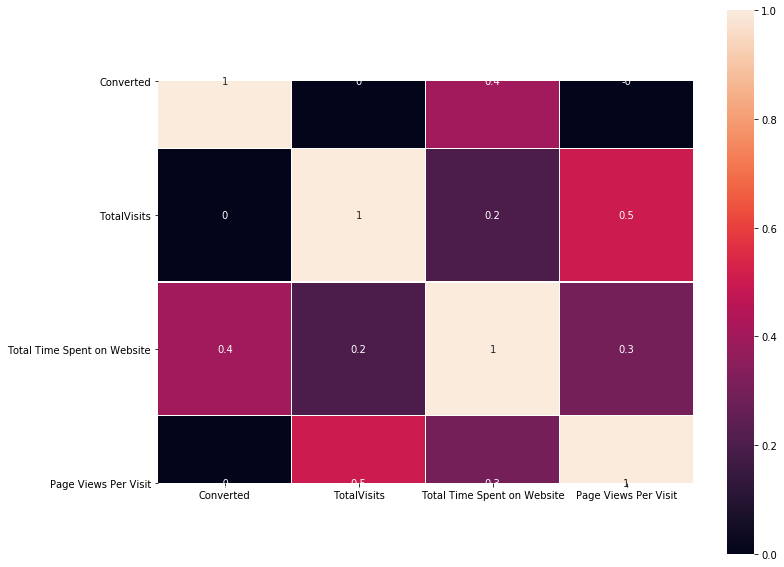

In [89]:
corr_matrix=x.corr().round(1)
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix, annot=True, linewidths=0.1, square=True)

In [90]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Tags                                      9240 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable Activity                     9240 non-null object
dtypes: flo

In [91]:
x['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

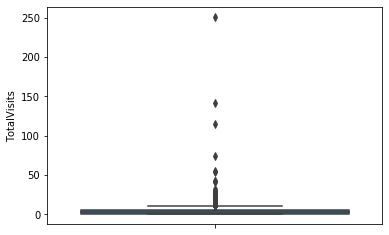

In [92]:
plt.figure(figsize=(6,4))
sns.boxplot(y=x['TotalVisits'])
plt.show()

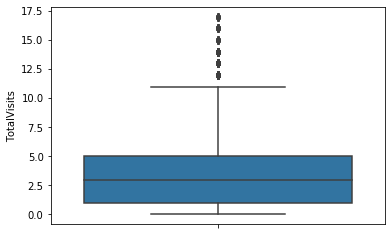

In [93]:
Q3 = x.TotalVisits.quantile(0.99)
x = x[(x.TotalVisits <= Q3)]
Q1 = x.TotalVisits.quantile(0.01)
x = x[(x.TotalVisits >= Q1)]
sns.boxplot(y=x['TotalVisits'])
plt.show()

In [94]:
x['Total Time Spent on Website'].describe()

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
25%         7.000000
50%       243.000000
75%       915.250000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

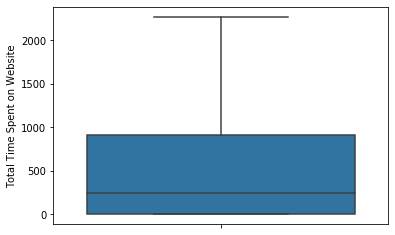

In [95]:
plt.figure(figsize=(6,4))
sns.boxplot(y=x['Total Time Spent on Website'])
plt.show()

In [96]:
x['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

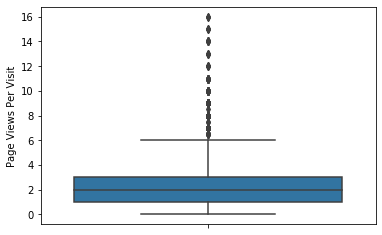

In [97]:
plt.figure(figsize=(6,4))
sns.boxplot(y=x['Page Views Per Visit'])
plt.show()

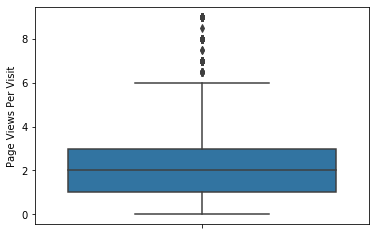

In [98]:
Q3 = x['Page Views Per Visit'].quantile(0.99)
x = x[x['Page Views Per Visit'] <= Q3]
Q1 = x['Page Views Per Visit'].quantile(0.01)
x = x[x['Page Views Per Visit'] >= Q1]
sns.boxplot(y=x['Page Views Per Visit'])
plt.show()

In [99]:
Converted = (sum(x['Converted'])/len(x['Converted'].index))*100
Converted

37.92025019546521

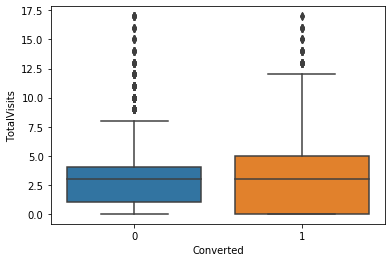

In [100]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = x)
plt.show()

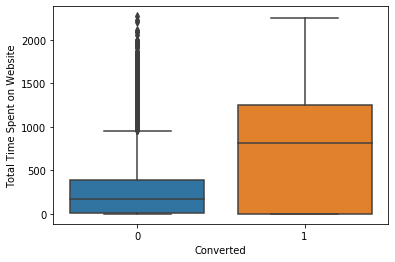

In [101]:
sns.boxplot(x=x.Converted, y=x['Total Time Spent on Website'])
plt.show()

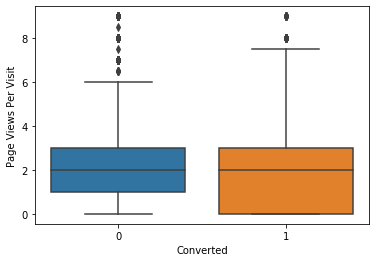

In [102]:
sns.boxplot(x=x.Converted,y=x['Page Views Per Visit'])
plt.show()

In [103]:
x.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [104]:
cat_cols= x.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [105]:
dummy = pd.get_dummies(x[['Lead Origin','What is your current occupation','City']], drop_first=True)
x = pd.concat([x,dummy],1)

In [106]:
dummy = pd.get_dummies(x['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
x = pd.concat([x, dummy], axis = 1)

In [107]:
dummy = pd.get_dummies(x['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
x = pd.concat([x, dummy], axis = 1)

In [108]:
dummy = pd.get_dummies(x['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
x = pd.concat([x, dummy], axis = 1)

In [109]:
dummy = pd.get_dummies(x['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
x = pd.concat([x, dummy], axis = 1)

In [110]:
dummy = pd.get_dummies(x['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
x = pd.concat([x, dummy], axis = 1)

In [111]:
x.drop(cat_cols,1,inplace = True)

In [112]:
y = x['Converted']
y.head()
X=x.drop('Converted', axis=1)

In [113]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
logmodel = LogisticRegression()

In [117]:
logmodel.fit(X_train,y_train)

C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
y_pred= logmodel.predict(X_test)

In [119]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logmodel,X,y)
print(scores)

C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.92227806 0.93031826 0.92457258]


In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9296351451973194

In [121]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1676
           1       0.93      0.88      0.90      1010

    accuracy                           0.93      2686
   macro avg       0.93      0.92      0.92      2686
weighted avg       0.93      0.93      0.93      2686



In [123]:
cm = confusion_matrix(y_test,y_pred)

In [124]:
print(cm)

[[1606   70]
 [ 119  891]]


In [125]:
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)

In [126]:
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, y_pred))

Decision Tree Accuracy is 0.92


In [127]:
score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)

Cross Validation Score = 0.91


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1676
           1       0.90      0.88      0.89      1010

    accuracy                           0.92      2686
   macro avg       0.92      0.91      0.91      2686
weighted avg       0.92      0.92      0.92      2686



In [129]:
cm = confusion_matrix(y_test,y_pred)

In [130]:
print(cm)

[[1578   98]
 [ 119  891]]


In [131]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,5.0,311,2.5,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
984,3.0,183,3.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8135,2.0,913,2.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6915,4.0,141,2.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2712,3.0,252,3.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [132]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logmodel,X,y)
print(scores)

C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.92227806 0.93031826 0.92457258]


In [133]:
accuracy_score(y_test, logmodel.predict(X_test))

0.9296351451973194

In [134]:
print(classification_report(y_test, logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1676
           1       0.93      0.88      0.90      1010

    accuracy                           0.93      2686
   macro avg       0.93      0.92      0.92      2686
weighted avg       0.93      0.93      0.93      2686



In [135]:
#Difference between K-Means and Knn
#        K-means                                                        Knn
#1.Unsupervised Learning                                     1.Supervised Learning.

#2.Used for Clustering problems.                              2.Used for Classification  
#                                                               and Regression problems.

#3.It makes division of objects                              3.It makes predictions by 
#  into clusters.                                              learning the past data.

In [136]:
# Working of K-Means:
# Step 1: Select number of K to decide number of Clusters.
# Step 2: Select random K points or centroids.
# Step 3: Assign each data point to their closest Centroid which will form the predefined K Clusters.
# Step 4: Calculate the Variance and place a new Centroid of each Cluster.
# Step 5: Goto Step 3(Reassign each datapoint to the new closest Centroid of each Cluster).
# Step 6: If any value is Reassigned then Goto Step 4 or else Goto Step 7.
# Step 7: Model is Ready.

In [137]:
# Working of KNN:
# Step 1: Select number of K of the Neighbours.
# Step 2: Calculate Euclidean Distance of K Neighbours.
# Step 3: Take K nearest neighbours as per Euclidean distance.
# Step 4: Count number of data in data points in each Category.
# Step 5: Assign the new data points to that Category for which the number of the Neighbours is Maximum.
# Step 6: Model is Ready.